<a href="https://colab.research.google.com/github/yyoonyoon/201935291-/blob/main/7_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망 모델 훈련

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/7-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [23]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 손실 곡선

정확도는 미세하게 반환을 못해서 손실함수를 씀. 손실함수 사용하면 미세하게 조정하여 쓸 수 있음.

In [24]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [25]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [26]:
model = model_fn()

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 100)               78500     
                                                                 
 dense_29 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [28]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


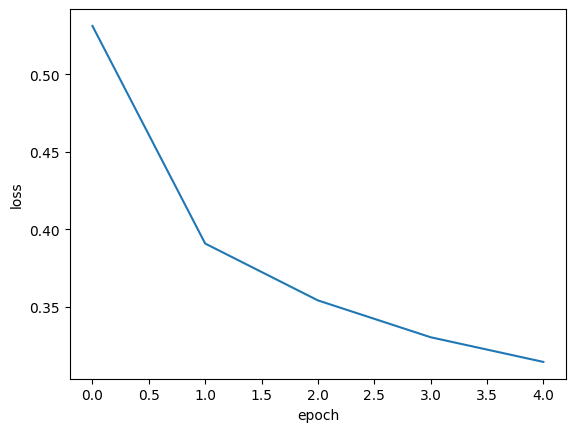

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

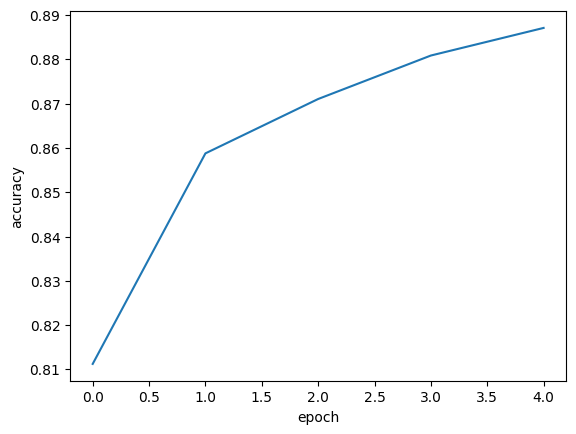

In [30]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [31]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

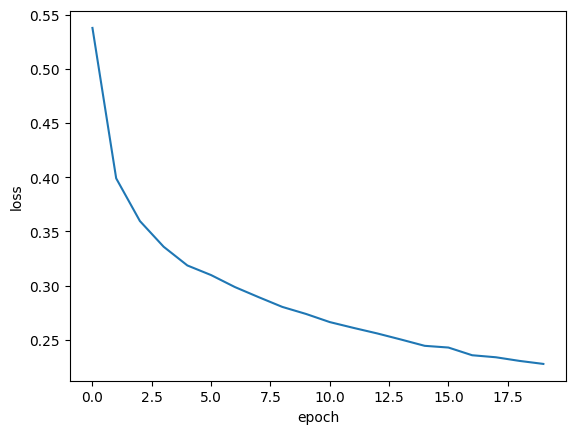

In [32]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 100)               78500     
                                                                 
 dense_33 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


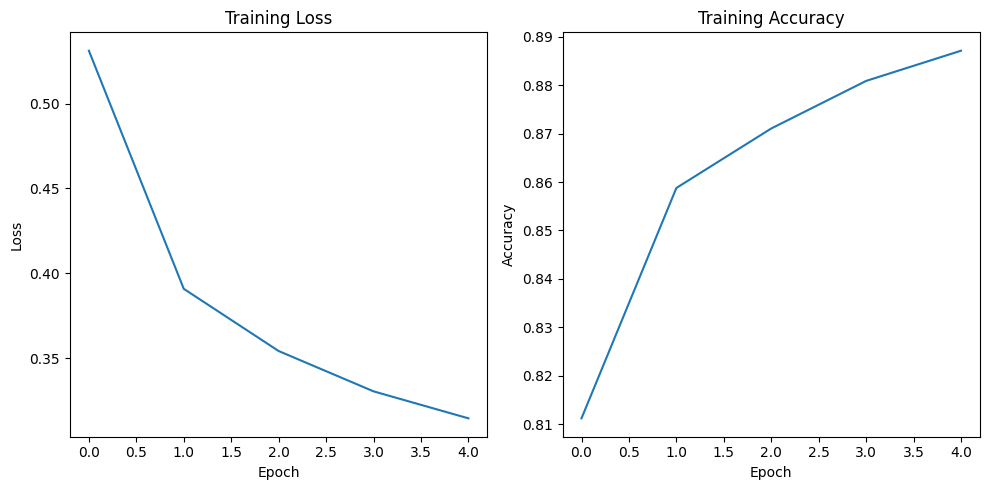

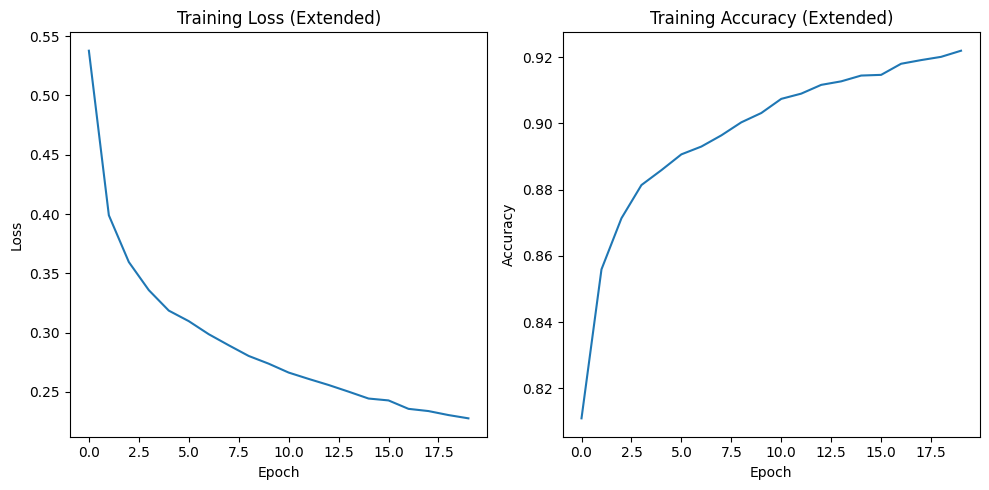

In [33]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

model = model_fn()

model.summary()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

# Loss 그래프 그리기
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')

# Accuracy 그래프 그리기
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.tight_layout()
plt.show()

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

# Loss 그래프 그리기
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss (Extended)')

# Accuracy 그래프 그리기
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy (Extended)')

plt.tight_layout()
plt.show()


## 검증 손실

In [22]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [34]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [57]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

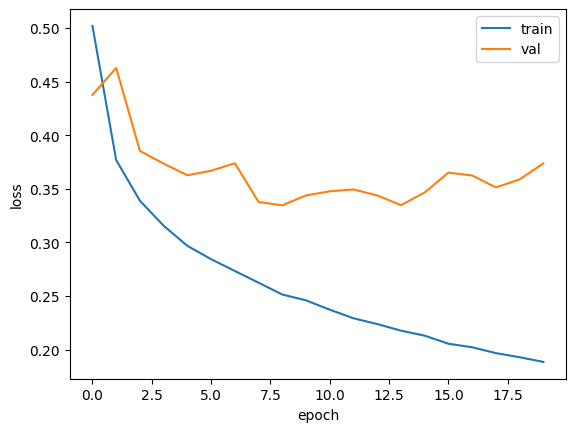

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

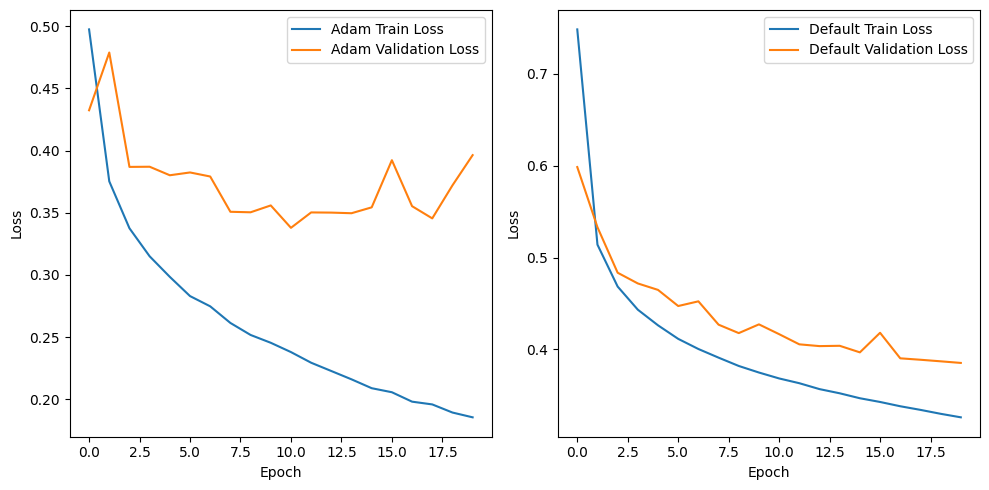

In [59]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
val_scaled, test_scaled, val_target, test_target = train_test_split(
    test_input / 255.0, test_target, test_size=0.5, random_state=42)

def model_fn(optimizer='adam'):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Adam 옵티마이저를 사용한 모델
adam_model = model_fn(optimizer='adam')
history_adam = adam_model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

# 기본 옵티마이저를 사용한 모델
default_optimizer_model = model_fn(optimizer='sgd')
history_default_optimizer = default_optimizer_model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

# Loss 그래프 그리기
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_adam.history['loss'], label='Adam Train Loss')
plt.plot(history_adam.history['val_loss'], label='Adam Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_default_optimizer.history['loss'], label='Default Train Loss')
plt.plot(history_default_optimizer.history['val_loss'], label='Default Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## 드롭아웃

In [63]:
def model_fn(dropout_rate=0.0):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if dropout_rate > 0.0:
        model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# 드롭아웃 레이어 추가한 모델 생성
dropout_model = model_fn(dropout_rate=0.3)

# 나머지 코드는 그대로 사용 가능


model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_24 (Flatten)        (None, 784)               0         
                                                                 
 dense_48 (Dense)            (None, 100)               78500     
                                                                 
 dense_49 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

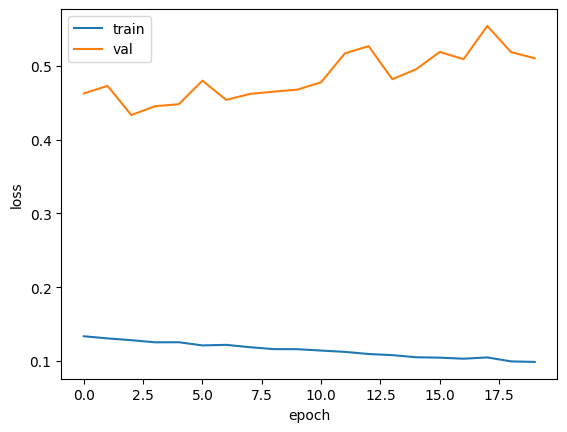

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

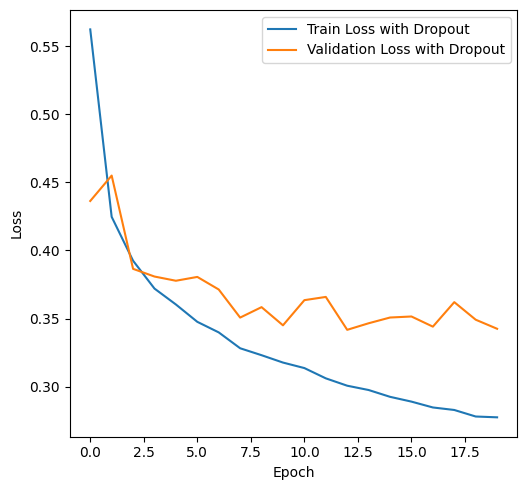

In [68]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
val_scaled, test_scaled, val_target, test_target = train_test_split(
    test_input / 255.0, test_target, test_size=0.5, random_state=42)

def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Dropout 레이어를 0.3 확률로 추가한 모델
dropout_model = model_fn(keras.layers.Dropout(0.3))
history_dropout = dropout_model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

# Loss 그래프 그리기
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dropout.history['loss'], label='Train Loss with Dropout')
plt.plot(history_dropout.history['val_loss'], label='Validation Loss with Dropout')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## 모델 저장과 복원

In [48]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

In [49]:
model.save_weights('model-weights.h5')

In [50]:
model.save('model-whole.h5')

In [51]:
!ls -al *.h5

-rw-r--r-- 1 root root 981176 Nov  6 03:22 best-model.h5
-rw-r--r-- 1 root root 333320 Nov  6 03:23 model-weights.h5
-rw-r--r-- 1 root root 981176 Nov  6 03:23 model-whole.h5


In [52]:
model = model_fn(keras.layers.Dropout(0.3))

model.load_weights('model-weights.h5')

In [53]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

157/157 [==============================] - 0s 2ms/step
0.8754


In [54]:
model = keras.models.load_model('model-whole.h5')

model.evaluate(val_scaled, val_target)

157/157 [==============================] - 1s 3ms/step - loss: 0.3472 - accuracy: 0.8754


[0.3471743166446686, 0.8754000067710876]

-rw-r--r-- 1 root root 981176 Nov  6 03:22 best-model.h5
-rw-r--r-- 1 root root 333320 Nov  6 03:40 model-weights.h5
-rw-r--r-- 1 root root 981176 Nov  6 03:40 model-whole.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


157/157 [==============================] - 0s 2ms/step
Accuracy with loaded weights: 0.8784
157/157 [==============================] - 1s 4ms/step - loss: 0.3450 - accuracy: 0.8784
Validation Loss: 0.34499141573905945
Validation Accuracy: 0.8784000277519226


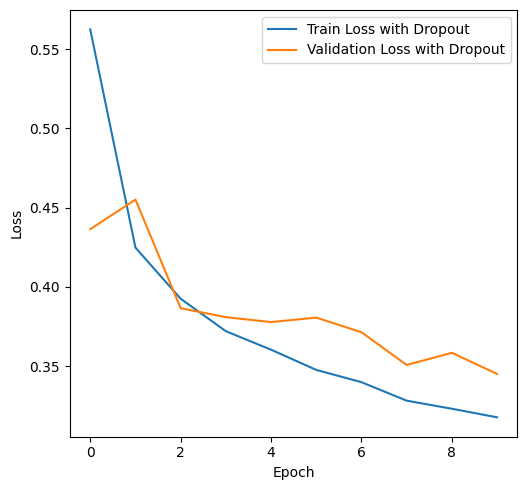

In [69]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
val_scaled, test_scaled, val_target, test_target = train_test_split(
    test_input / 255.0, test_target, test_size=0.5, random_state=42)

def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Dropout 레이어를 추가한 모델을 학습
dropout_model = model_fn(keras.layers.Dropout(0.3))
history_dropout = dropout_model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

# 모델 가중치 및 전체 모델 저장
dropout_model.save_weights('model-weights.h5')
dropout_model.save('model-whole.h5')

# 저장된 파일 목록 확인
!ls -al *.h5

# 모델 가중치 로드 및 성능 확인
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
accuracy_with_weights = np.mean(val_labels == val_target)
print("Accuracy with loaded weights:", accuracy_with_weights)

# 전체 모델 로드 및 성능 확인
model = keras.models.load_model('model-whole.h5')
evaluation_result = model.evaluate(val_scaled, val_target)
print("Validation Loss:", evaluation_result[0])
print("Validation Accuracy:", evaluation_result[1])

# Loss 그래프 그리기
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dropout.history['loss'], label='Train Loss with Dropout')
plt.plot(history_dropout.history['val_loss'], label='Validation Loss with Dropout')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## 콜백

In [37]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
model = keras.models.load_model('best-model.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3210 - accuracy: 0.8842


[0.3210001289844513, 0.8842499852180481]

In [39]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [40]:
print(early_stopping_cb.stopped_epoch)

9


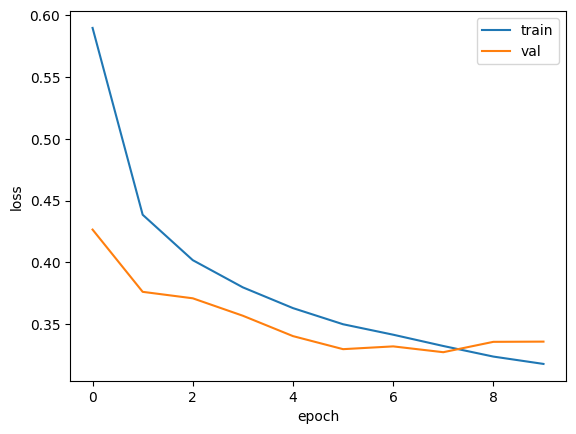

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [42]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3274 - accuracy: 0.8823


[0.3273640275001526, 0.8822500109672546]

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


157/157 [==============================] - 1s 2ms/step - loss: 0.3384 - accuracy: 0.8836
Validation Loss (Best Model): 0.3384259343147278
Validation Accuracy (Best Model): 0.8835999965667725


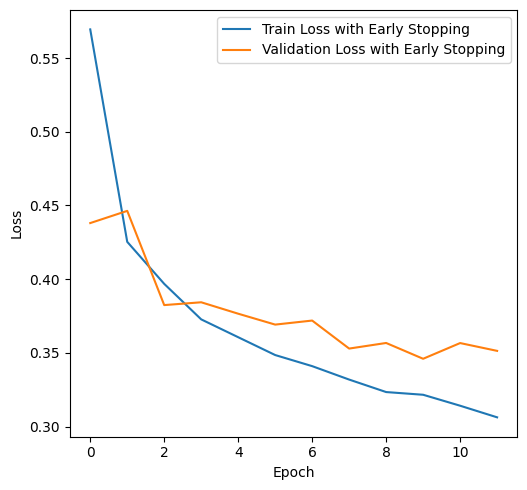

157/157 [==============================] - 0s 2ms/step - loss: 0.3460 - accuracy: 0.8756
Validation Loss (Early Stopping): 0.34596899151802063
Validation Accuracy (Early Stopping): 0.8755999803543091


In [47]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
val_scaled, test_scaled, val_target, test_target = train_test_split(
    test_input / 255.0, test_target, test_size=0.5, random_state=42)

def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28, 1)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Dropout 레이어를 추가한 모델을 학습
dropout_model = model_fn(keras.layers.Dropout(0.3))
history_dropout = dropout_model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

# ModelCheckpoint 콜백 사용하여 최상의 모델 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
dropout_model.fit(train_scaled, train_target, epochs=5, verbose=0,
                 validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])
best_model = keras.models.load_model('best-model.h5')
evaluation_result = best_model.evaluate(val_scaled, val_target)
print("Validation Loss (Best Model):", evaluation_result[0])
print("Validation Accuracy (Best Model):", evaluation_result[1])

# EarlyStopping 콜백과 ModelCheckpoint 콜백을 함께 사용하여 학습
model = model_fn(keras.layers.Dropout(0.3))
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

# Loss 그래프 그리기
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss with Early Stopping')
plt.plot(history.history['val_loss'], label='Validation Loss with Early Stopping')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
evaluation_result = model.evaluate(val_scaled, val_target)
print("Validation Loss (Early Stopping):", evaluation_result[0])
print("Validation Accuracy (Early Stopping):", evaluation_result[1])
